### Implementación de un perceptron multicapa mediante un Estimator 

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
# Paso 1: Cargar el dataset MNIST
from tensorflow.keras.datasets import mnist
import numpy as np

In [2]:
#Dividir los datos en entrenamiento y prueba.

(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Paso 2: Preprocesamiento de los datos
x_train = x_train / 255.0  # Normalizar los valores de píxeles entre 0 y 1
x_test = x_test / 255.0

# Paso 3: Crear el modelo de la red neuronal
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense

model = Sequential()
model.add(Flatten(input_shape=(28, 28)))  # Aplanar la imagen en una sola dimensión
model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=128, activation='relu'))  # Capa oculta con activación ReLU
model.add(Dense(units=10, activation='softmax'))  # Capa de salida con activación softmax para las 10 clases

# Paso 4: Compilar el modelo
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Paso 5: Entrenar el modelo
history = model.fit(x_train, y_train, epochs=20, validation_data=(x_test, y_test))

# Paso 6: Evaluar el modelo con el conjunto de prueba
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Precisión en el conjunto de prueba:', test_acc)


Epoch 1/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2266 - accuracy: 0.9314 - val_loss: 0.1352 - val_accuracy: 0.9586
Epoch 2/20
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0977 - accuracy: 0.9693 - val_loss: 0.1029 - val_accuracy: 0.9681
Epoch 3/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0705 - accuracy: 0.9779 - val_loss: 0.1221 - val_accuracy: 0.9621
Epoch 4/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0542 - accuracy: 0.9830 - val_loss: 0.0881 - val_accuracy: 0.9760
Epoch 5/20
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0463 - accuracy: 0.9851 - val_loss: 0.0981 - val_accuracy: 0.9718
Epoch 6/20
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0382 - accuracy: 0.9874 - val_loss: 0.0833 - val_accuracy: 0.9769
Epoch 7/20
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0321 - accuracy: 0.9898 - val_loss: 0.0969 - val_accuracy:

In [3]:
model.save('modelo_mnist_keras')

INFO:tensorflow:Assets written to: modelo_mnist_keras\assets


INFO:tensorflow:Assets written to: modelo_mnist_keras\assets


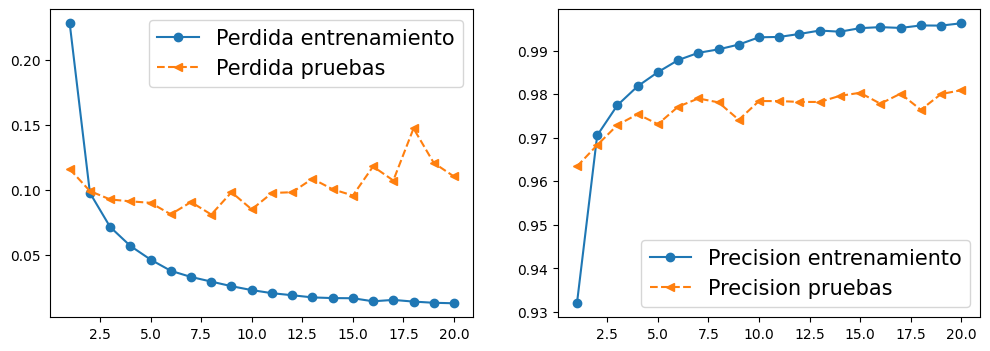

In [11]:
import matplotlib.pyplot as plt
hist = history.history
x_arr = np.arange(len(hist['loss'])) + 1
fig = plt.figure(figsize=(12, 4))
ax = fig.add_subplot(1, 2, 1)
ax.plot(x_arr, hist['loss'], '-o', label='Perdida entrenamiento')
ax.plot(x_arr, hist['val_loss'], '--<', label='Perdida pruebas')
ax.legend(fontsize=15)
ax = fig.add_subplot(1, 2, 2)
ax.plot(x_arr, hist['accuracy'], '-o', label='Precision entrenamiento')
ax.plot(x_arr, hist['val_accuracy'], '--<',
        label='Precision pruebas')
ax.legend(fontsize=15)
plt.show()

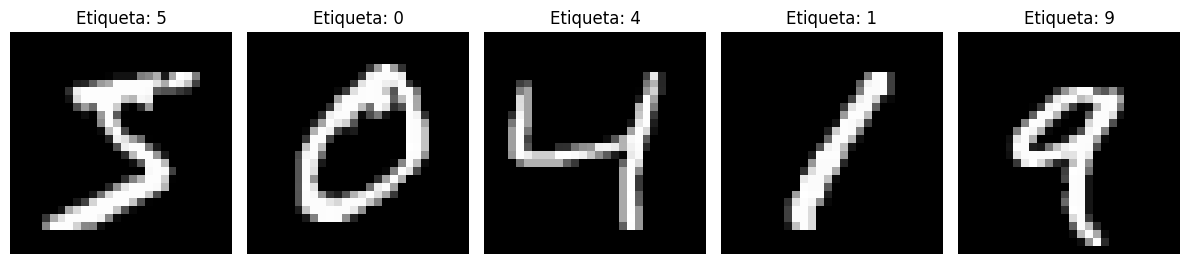

In [12]:
import matplotlib.pyplot as plt

# Crear una figura con una fila de subplots
fig, axs = plt.subplots(1, 5, figsize=(12, 3))

# Mostrar los números en cada subplot
for i in range(5):
    axs[i].imshow(x_train[i], cmap='gray')
    axs[i].set_title('Etiqueta: ' + str(y_train[i]))
    axs[i].axis('off')  # Ocultar ejes

# Ajustar el espaciado entre subplots
plt.tight_layout()

# Mostrar la imagen con la fila de números
plt.show()

In [16]:
x_train[0].shape

(28, 28)

### Prediccion en tiempo real mientras dibujas el número.

import tkinter as tk
from PIL import Image, ImageDraw
import numpy as np
import io

#### Predecir el número dibujado

def predecir_numero(imagen):
    if imagen:
        image = imagen.resize((28, 28)).convert('L')  # Redimensionar y convertir a escala de grises
        image = ImageOps.invert(image)  # Invertir los colores de la imagen
        image = np.array(image) / 255.0  # Convertir a arreglo NumPy y normalizar los valores de píxeles entre 0 y 1
        image = image.reshape(1, 28, 28)  # Añadir una dimensión para que coincida con el formato de entrada del modelo
        prediction = model.predict([image])
        numero_predicho = prediction.argmax()
        label_prediccion.config(text="Número predicho: " + str(numero_predicho))
    else:
        label_prediccion.config(text="No se ha dibujado ningún número")
        



def borrar_lienzo():
    lienzo.delete("all")
    label_prediccion.config(text="Número predicho: ")



ventana = tk.Tk()
ventana.title("MNIST Predictor")


lienzo = tk.Canvas(ventana, width=200, height=200, bg="white")
lienzo.grid(row=0, column=0, columnspan=2)


boton_predecir = tk.Button(ventana, text="Predecir", command=predecir_numero)
boton_predecir.grid(row=1, column=0)


boton_borrar = tk.Button(ventana, text="Borrar", command=borrar_lienzo)
boton_borrar.grid(row=1, column=1)


label_prediccion = tk.Label(ventana, text="Número predicho: ")
label_prediccion.grid(row=2, column=0, columnspan=2)


def dibujar(event):
    x1, y1 = (event.x - 10), (event.y - 10)
    x2, y2 = (event.x + 10), (event.y + 10)
    lienzo.create_oval(x1, y1, x2, y2, fill="black")
    
    imagen_dibujada = lienzo.postscript(colormode='gray')
    imagen_dibujada = Image.open(io.BytesIO(imagen_dibujada.encode('utf-8')))
    imagen_dibujada = imagen_dibujada.resize((28, 28)).convert('L')
    predecir_numero(imagen_dibujada)

lienzo.bind("<B1-Motion>", dibujar)

# Cargar el modelo previamente entrenado
from tensorflow.keras.models import load_model
model = load_model('modelo_mnist.h5')

# Iniciar la ventana
ventana.mainloop()